# VA DEQ & StreamStats Exploratory Data Analysis
The purpose of this Jupyter notebook is to:


Emma Reilly Oare

In [65]:
#Read in libs
import pandas as pd
import numpy as np
import pylab
import math
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import openpyxl
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.models import Sequential 
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam   
from keras import regularizers  
from scipy.stats import uniform, expon
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets, interact
import os

## Step 1. Import dataset

In [66]:
# Define base directory
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), "../../.."))

In [67]:
# Read in joined and cleaned excel sheet
vadeq_path = os.path.join(BASE_DIR, "data", "processed", "virginia", "vadeq_strmstats_mrgd.xlsx")
vadeq_strmsts = pd.read_excel(vadeq_path).drop(columns = ['Unnamed: 0'])

In [68]:
# Display dataframe
vadeq_strmsts

,StationID,Date,ReachLength,Slope,RP100,BR_PCT,HP_PCT,RC_PCT,BL_PCT,CB_PCT,GC_PCT,GF_PCT,SA_PCT,FN_PCT,WD_PCT,OT_PCT,BL_CB_GR_PCT,SA_FN_PCT,TotSubstrate_PCT,LSUB_DMM,VLW_msq,Xdepth,Xwid,XBKF_W,BKF_depth_in_meters,BKFW_BKFD,incised_depth,Xembed,LRBS2,Year,RELIEF,STATSCLY30,LC01IMP,STATSOM2_6,PDIGMET,LC06FORSHB,LC11GRASS,PKREGNO,BRMETA,STATSCLY40,PRECIP,STATSPERM,STATSCLY50,STATSCLY60,LC01DEV,LC06GRASS,LC06WATER,LC11IMP,STATSWATCP,I24H2Y,STATOM19_8,LC06CRPHAY,LC11WATER,LC06IMP,LC06DEV,LC11CRPHAY,LFREGNO,LC11DEV,LC01FORSHB,VRPLSLC,VRCARB,LC06WETLND,STATSGODEP,MINBELEV,LC11FORSHB,LC11WETLND,DRNAREA,LC01BARE,ELEV,LC11BARE,CPSED,LC01CRPHAY,STATSCLAY10,STATSCLY20,LC06BARE,LC01WATER,LC01HERB,STATSOM0_5,ELEVMAX,LC01WETLND,Shape_Length,Shape_Area,FID,LATITUDE,LONGITUDE,OBJECTID,Join_Count,TARGET_FID,US_L3CODE,US_L3NAME,NA_L3CODE,NA_L3NAME,NA_L2CODE,NA_L2NAME,NA_L1CODE,NA_L1NAME,STATE_NAME,EPA_REGION,L3_KEY,L2_KEY,L1_KEY,Shape_Leng,Slope [m/m],u* [m/s],RefStress,1 Day 1.11 Year Low Flow,1 Day 1.25 Year Low Flow,1 Day 1.43 Year Low Flow,1 Day 1.67 Year Low Flow,1 Day 2 Year Low Flow,10-percent AEP flood,2-percent AEP flood,20-percent AEP flood,30 Day 1.11 Year Low Flow,30 Day 1.25 Year Low Flow,30 Day 1.43 Year Low Flow,4 Day 1.11 Year Low Flow,4 Day 1.25 Year Low Flow,4-percent AEP flood,7 Day 1.11 Year Low Flow,7 Day 1.25 Year Low Flow,7 Day 1.43 Year Low Flow,7 Day 1.67 Year Low Flow,Bieger_D_channel_cross_sectional_area,Bieger_D_channel_depth,Bieger_D_channel_width,Bieger_USA_channel_cross_sectional_area,Bieger_USA_channel_depth,Bieger_USA_channel_width,Urban 0.2-percent AEP flood,Urban 0.5-percent AEP flood,Urban 1-percent AEP flood,Urban 10-percent AEP flood,Urban 2-percent AEP flood,Urban 20-Percent AEP flood,Urban 4-percent AEP flood,Urban 42.9-percent AEP flood,Urban 50-percent AEP flood,Urban 66.7-percent AEP flood,Urban 80-percent AEP flood,Urban 90-percent AEP flood,Urban 95-percent AEP flood,Urban 99-percent AEP flood,Urban 99.5-percent AEP flood,Month,DRNAREA_SQKM
0,1AACO006.10,2006-11-21,440,0.220,34.752500,7.692308,6.730769,0.000000,9.615385,14.423077,35.576923,6.730769,16.346154,2.884615,0.000000,0.0,66.346154,19.230769,100.0,1.582869,0.001897,66.12,14.690476,18.636364,1.123018,16.594890,2.547564,62.545455,0.517308,2006,171.0,100.00,14.94,0.00,33.39,37.62,0.00,1551,0.0,0.00,43.078,2.895,0.00,0.00,57.04,0.00,0.00,19.30,0.000,3.140,0,0.00,0.00,14.20,56.93,0.00,1545,83.80,42.96,0.00,0.00,0.00,70.48,54.96,16.23,0.00,0.0702,0.00,148.98,0.00,66.61,0.00,0.0,0.00,5.45,0.00,0.00,100.00,225.47,0.00,2380,181800,0,38.728611,-77.203333,1,1,0,45,Piedmont,8.3.4,Piedmont,8.3,SOUTHEASTERN USA PLAINS,8,EASTERN TEMPERATE FORESTS,Virginia,3,45 Piedmont,8.3 SOUTHEASTERN USA PLAINS,8 EASTERN TEMPERATE FORESTS,1.347537e+06,0.00220,0.155682,NaN,0.012467,0.007940,0.005353,0.003673,0.002477,71.533333,166.366667,45.000000,0.039167,0.027933,0.020600,0.033533,0.024733,118.666667,0.041400,0.029733,0.022600,0.017200,2.66,0.523,5.05,4.07,0.685,4.86,426.333333,351.333333,293.666667,136.333333,219.666667,106.866667,167.333333,84.400000,78.800000,78.666667,65.633333,63.500000,54.8,64.933333,64.200000,11,0.181817
1,1AACO004.84,2008-06-25,320,0.521,25.757012,0.000000,0.952381,0.000000,5.714286,27.619048,26.666667,14.285714,10.476190,7.619048,6.666667,0.0,74.285714,18.095238,100.0,1.165237,0.004859,56.22,9.580952,15.372727,0.989473,15.536282,2.275836,51.636364,-0.245939,2008,451.0,48.13,21.97,0.00,87.78,25.10,0.01,1550,0.0,0.02,43.888,2.395,0.00,0.00,70.34,0.01,0.25,23.10,0.133,3.167,0,0.28,0.26,22.19,71.05,0.11,1544,73.50,25.82,0.00,0.00,3.27,66.65,39.50,22.49,3.50,40.5000,0.03,308.44,0.17,11.98,0.28,0.0,51.85,0.05,0.25,0.01,100.00,490.18,3.28,85900,105013700,1,38.720500,-77.190722,2,1,1,65,Southeastern Plains,8.3.5,Southeastern Plains,8.3,SOUTHEASTERN USA PLAINS,8,EASTERN TEMPERATE FORESTS,Virginia,3,65 Southeastern Plains,8.3 SOUTHEASTERN USA PLAINS,8 EASTERN TEMPERATE FORESTS,1.388810e+06,0.00521,0.224882,NaN,6.723333,4.653333,3.446667,2.620000,1.960000,2

## Step 2. EDA

### 2a. Station embeddedness temporal variation
We will first need to check on stations that have been monitored for multiple years. **The VA DEQ assumed minimal variation for most sites across multiple visits**, so let's check before moving on.

In [69]:
# Identify the StationIDs that appear more than once
stn_count = vadeq_strmsts['StationID'].value_counts()
mult_stn = stn_count[stn_count > 2].index
mult_stn_obj = stn_count[stn_count > 2]

# Create a filtered dataset to only include these StationIDs
multiyr_vdeq = vadeq_strmsts[vadeq_strmsts['StationID'].isin(mult_stn)]

# Check how many stations this encompasses
multiyr_vdeq.nunique()

StationID                        33
Date                            163
ReachLength                      13
Slope                           151
RP100                           171
                               ... 
Urban 95-percent AEP flood       33
Urban 99-percent AEP flood       33
Urban 99.5-percent AEP flood     33
Month                            10
DRNAREA_SQKM                     32
Length: 146, dtype: int64

**Here we can see that 33 stations were visited more than twice (3 or greater times).**

In [70]:
# Turn multiple station series into a dataframe
mult_stn_df = mult_stn_obj.to_frame()

# Show df
mult_stn_df

,count
StationID,
2-TYE008.77,9
2-LIJ003.06,9
2-RED003.65,8
8-POR015.70,8
4ABAU011.17,8
...,...
3-PIY003.27,3
4BGAR001.19,3
2-THK000.03,3


Let's now check how many stations see significant change.

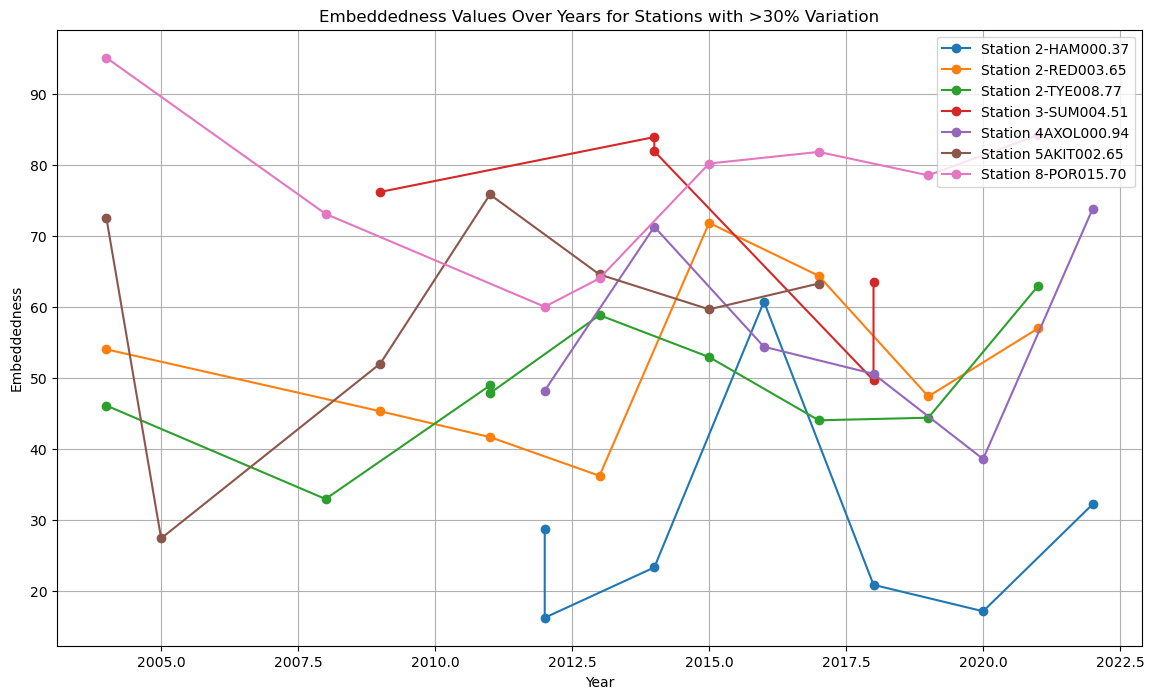

,StationID,min,max,Xembed_pct_change
25,5AKIT002.65,27.363636,75.818182,48.454545
4,2-HAM000.37,16.181818,60.727273,44.545455
8,2-RED003.65,36.181818,71.818182,35.636364
22,4AXOL000.94,38.545455,73.818182,35.272727
28,8-POR015.70,60.000000,95.090909,35.090909
...,...,...,...,...
24,4BGAR001.19,40.727273,46.909091,6.181818
0,1AGOO039.63,80.272727,86.000000,5.727273
27,6AFRY006.70,64.000000,68.181818,4.181818
32,9-WLK054.42,48.181818,52.000000,3.818182


In [71]:
# Reset index
if 'StationID' in multiyr_vdeq.index.names:
    multiyr_vdeq.reset_index(inplace=True, drop=True)

# Calculate the minimum and maximum embeddedness values for each site
min_max_values = multiyr_vdeq.groupby('StationID')['Xembed'].agg(['min', 'max']).reset_index()

# Calculate the overall percentage change from min to max for each site
min_max_values['Xembed_pct_change'] = (min_max_values['max'] - min_max_values['min']).abs()

# Identify the stations that have more than given variation
variation_threshold = 30
stations_with_high_variation = min_max_values[min_max_values['Xembed_pct_change'] >= variation_threshold]['StationID'].unique()

# Plot the Xembed values over the years for these StationIDs
plt.figure(figsize=(14, 8))
for station in stations_with_high_variation:
    station_data = multiyr_vdeq[multiyr_vdeq['StationID'] == station]
    plt.plot(station_data['Year'], station_data['Xembed'], marker='o', label=f'Station {station}')

plt.xlabel('Year')
plt.ylabel('Embeddedness')
plt.title(f'Embeddedness Values Over Years for Stations with >{variation_threshold}% Variation')
plt.legend()
plt.grid(True)
plt.legend()
plt.show()

min_max_values.sort_values(by = ['Xembed_pct_change'],
                           ascending = False)

From the above plot, we find evidence that many stations visited more than twice have large variations, as high as 48% variation! We will export this dataset for future analysis. This is not pertinent to the scope of this study, but could be used in future work.

In [72]:
# Send stations to csv for arcgis Pro
from dbfread import DBF

# Read in coordinates of VDEQ sites for joining
dbf_path = os.path.join(BASE_DIR, "data", "GIS", "vdeq_emd_snap_albers.dbf")
dbf = DBF(dbf_path)
coords = pd.DataFrame(iter(dbf))
coords = coords[['StationID',
               'LATITUDE_C',
               'LONGITUDE_']].rename(columns = {'LATITUDE_C':'LATITUDE',
                                                'LONGITUDE_':'LONGITUDE'})

# Join dataframe 
vdeq_multi = min_max_values.merge(coords,
                                 on = 'StationID',
                                 how = 'left')

# Display df before pushing to csv
vdeq_multi

,StationID,min,max,Xembed_pct_change,LATITUDE,LONGITUDE
0,1AGOO039.63,80.272727,86.000000,5.727273,38.929400,-77.873700
1,1AXMJ000.42,37.272727,58.181818,20.909091,38.637500,-77.505500
2,2-DCK003.94,21.090909,47.727273,26.636364,37.463344,-80.348272
3,2-DDY000.75,10.363636,32.000000,21.636364,38.177135,-79.375906
4,2-HAM000.37,16.181818,60.727273,44.545455,37.412800,-80.021000
...,...,...,...,...,...,...
28,8-POR015.70,60.000000,95.090909,35.090909,38.203261,-77.639800
29,9-BSH012.62,84.727273,96.363636,11.636364,37.056000,-80.299389
30,9-LRR012.30,94.545455,98.000000,3.454545,37.256667,-81.459167
31,9-LRY007.02,14.181818,31.363636,17.181818,37.373917,-80.573500


In [73]:
# Export to csv for GIS use
multi_path = os.path.join(BASE_DIR, "data", "GIS", "vadeq_grtr_30_var_coords.csv")
vdeq_multi.to_csv(multi_path)

Lastly, we'll see how much of the main dataset they make up.

In [74]:
# Remove stations with high variation from the main vadeq_strmsts DataFrame
filtered_vadeq_strmsts = vadeq_strmsts[~vadeq_strmsts['StationID'].isin(stations_with_high_variation)]

# Print the resulting DataFrame shape to decide if it is worth it taking out sites that vary
print("Original vadeq_strmsts shape:", vadeq_strmsts.shape)
print("Filtered vadeq_strmsts shape:", filtered_vadeq_strmsts.shape)

Original vadeq_strmsts shape: (1117, 146)
Filtered vadeq_strmsts shape: (1067, 146)


Hmmm, well this is not unexpected. **However, Dr. Czuba discussed allowing for duplicates and seeing if the model responds positively. We will continue with EDA on the original set, then change tactics if necessary.**

### 2b. Correlation EDA

We will use different correlation EDA to identify the variables with the most potential.
<br><br> **Prior to selecting the top correlations, we will remove any data that would have been collected in the field.**

In [80]:
# Drop remotely sensed data
vadeq_strmsts_nofield = vadeq_strmsts.drop(columns = ['ReachLength', 
                                                      'Slope',
                                                      'Slope [m/m]',
                                                      'u* [m/s]',
                                                      'RP100', 
                                                      'BR_PCT',
                                                       'HP_PCT', 
                                                      'RC_PCT', 
                                                      'BL_PCT', 
                                                      'CB_PCT', 
                                                      'GC_PCT', 
                                                      'GF_PCT', 
                                                      'SA_PCT',
                                                       'FN_PCT', 
                                                      'WD_PCT', 
                                                      'OT_PCT', 
                                                      'BL_CB_GR_PCT', 
                                                      'SA_FN_PCT',
                                                       'TotSubstrate_PCT',
                                                      'LSUB_DMM', 
                                                      'VLW_msq', 
                                                      'Xdepth', 
                                                      'Xwid', 
                                                      'XBKF_W',
                                                       'BKF_depth_in_meters', 
                                                      'BKFW_BKFD', 
                                                      'incised_depth', 
                                                      'LRBS2'])

We're going to drop some other columns that we've identifed as not suitable for model building and our scope:
* We will only keep land use from 2011 (They are *very* highly correlated by year)
* We won't keep geologic information because it's usually specific to a region and can create a sparse matrix

In [81]:
# Drop other columns that are not necessary for model building (professional expertise)
vadeq_strmsts_corr_df = vadeq_strmsts_nofield.drop(columns = ['STATSOM2_6',
                                                      'PDIGMET',
                                                      'LC06FORSHB',
                                                      'BRMETA',
                                                      'LC01DEV',
                                                      'LC06GRASS',
                                                      'LC06WATER',
                                                      'STATOM19_8',
                                                      'LC06CRPHAY',
                                                      'LC06IMP',
                                                      'LC06DEV',
                                                      'LC01FORSHB',
                                                      'VRPLSLC',
                                                      'VRCARB',
                                                      'LC06WETLND',
                                                      'DRNAREA',
                                                      'LC01BARE',
                                                      'CPSED',
                                                      'LC01CRPHAY',
                                                      'LC06BARE',
                                                      'LC01WATER',
                                                      'LC01HERB',
                                                      'STATSOM0_5',
                                                      'LC01WETLND',
                                                      'Shape_Length',
                                                      'Shape_Area',
                                                      'LATITUDE',
                                                      'LONGITUDE',
                                                      'OBJECTID',
                                                      'Join_Count',
                                                      'TARGET_FID',
                                                      'STATE_NAME',
                                                      'EPA_REGION',
                                                      'Shape_Leng'])

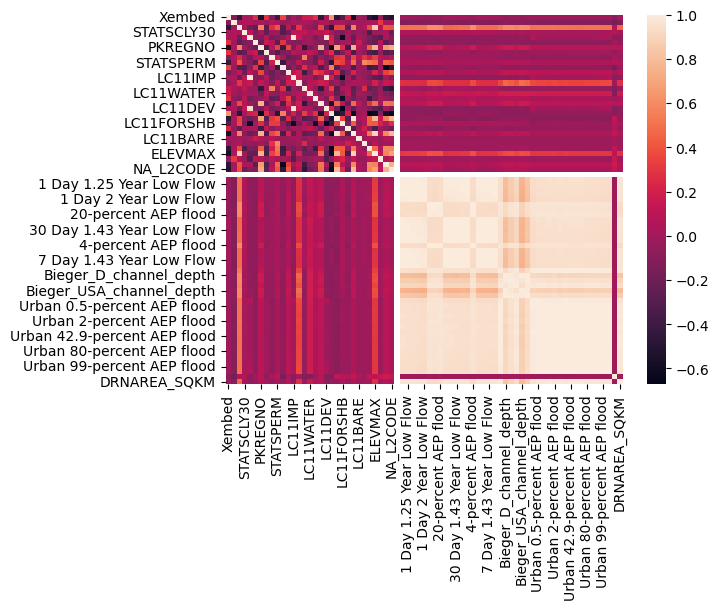

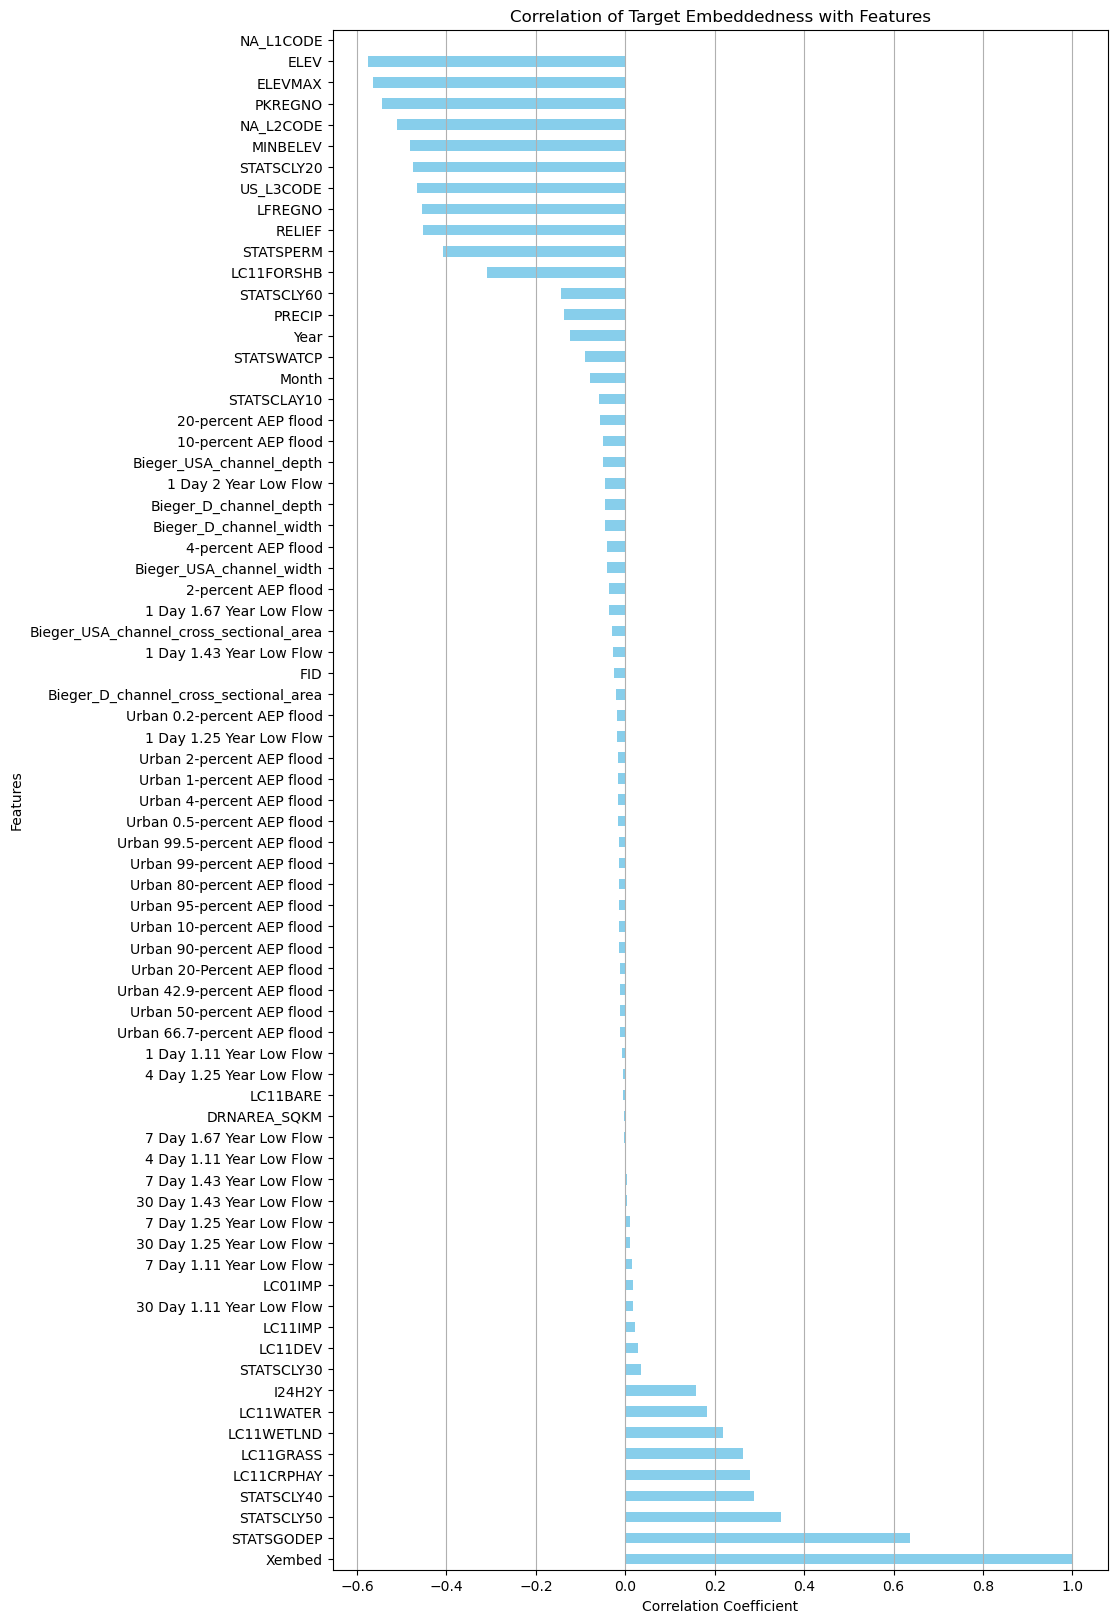

In [82]:
# Create correlation matrix and heatmap

# Select for only numerical values
num_df = vadeq_strmsts_corr_df.select_dtypes(include='number')
corr = num_df.corr()
# Print correlation plot
sns.heatmap(corr)

# Select the target value row
target_corr = corr.loc['Xembed'].sort_values(ascending = False)

# Plot the horizontal bar plot
plt.figure(figsize=(10, 20))
target_corr.plot(kind='barh', color='skyblue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title(f'Correlation of Target Embeddedness with Features')
plt.grid(axis='x')
plt.show()

In [85]:
corr

,Xembed,Year,RELIEF,STATSCLY30,LC01IMP,LC11GRASS,PKREGNO,STATSCLY40,PRECIP,STATSPERM,STATSCLY50,STATSCLY60,LC11IMP,STATSWATCP,I24H2Y,LC11WATER,LC11CRPHAY,LFREGNO,LC11DEV,STATSGODEP,MINBELEV,LC11FORSHB,LC11WETLND,ELEV,LC11BARE,STATSCLAY10,STATSCLY20,ELEVMAX,FID,US_L3CODE,NA_L2CODE,NA_L1CODE,1 Day 1.11 Year Low Flow,1 Day 1.25 Year Low Flow,1 Day 1.43 Year Low Flow,1 Day 1.67 Year Low Flow,1 Day 2 Year Low Flow,10-percent AEP flood,2-percent AEP flood,20-percent AEP flood,30 Day 1.11 Year Low Flow,30 Day 1.25 Year Low Flow,30 Day 1.43 Year Low Flow,4 Day 1.11 Year Low Flow,4 Day 1.25 Year Low Flow,4-percent AEP flood,7 Day 1.11 Year Low Flow,7 Day 1.25 Year Low Flow,7 Day 1.43 Year Low Flow,7 Day 1.67 Year Low Flow,Bieger_D_channel_cross_sectional_area,Bieger_D_channel_depth,Bieger_D_channel_width,Bieger_USA_channel_cross_sectional_area,Bieger_USA_channel_depth,Bieger_USA_channel_width,Urban 0.2-percent AEP flood,Urban 0.5-percent AEP flood,Urban 1-percent AEP flood,Urban 10-percent AEP flood,Urban 2-percent AEP flood,Urban 20-Percent AEP flood,Urban 4-percent AEP flood,Urban 42.9-percent AEP flood,Urban 50-percent AEP flood,Urban 66.7-percent AEP flood,Urban 80-percent AEP flood,Urban 90-percent AEP flood,Urban 95-percent AEP flood,Urban 99-percent AEP flood,Urban 99.5-percent AEP flood,Month,DRNAREA_SQKM
Xembed,1.000000,-0.124494,-0.451912,0.036070,0.016293,0.263214,-0.544441,0.287355,-0.137294,-0.407045,0.348277,-0.142969,0.022107,-0.090145,0.158209,0.183632,0.279314,-0.455608,0.028427,0.636138,-0.481246,-0.309803,0.218913,-0.576160,-0.004030,-0.058421,-0.476008,-0.565197,-0.025302,-0.465845,-0.511480,NaN,-0.007901,-0.018947,-0.028168,-0.036035,-0.045494,-0.049861,-0.036215,-0.056502,0.017419,0.011593,0.004923,0.000458,-0.005993,-0.041724,0.015966,0.010104,0.004528,-0.002063,-0.021390,-0.045059,-0.044818,-0.029012,-0.049775,-0.041145,-0.019132,-0.015262,-0.015458,-0.013405,-0.016070,-0.012862,-0.015358,-0.012484,-0.012434,-0.012362,-0.013744,-0.013349,-0.013478,-0.013774,-0.014029,-0.078641,-0.002597
Year,-0.124494,1.000000,0.003775,0.057913,0.056033,-0.012639,0.030217,-0.030716,0.067088,0.043900,-0.047938,-0.022433,0.057599,0.021397,0.054590,0.009850,-0.081066,0.058927,0.052775,-0.059598,0.030785,0.031126,-0.061567,0.034355,-0.018187,0.008586,0.023229,0.019108,0.301376,0.022640,0.023603,NaN,-0.110862,-0.112038,-0.112742,-0.113377,-0.113995,-0.102916,-0.096519,-0.105966,-0.109687,-0.110252,-0.110669,-0.110780,-0.111683,-0.099275,-0.110364,-0.111488,-0.112070,-0.112805,-0.109468,-0.072545,-0.087921,-0.100107,-0.061382,-0.081587,-0.095761,-0.106153,-0.106674,-0.108232,-0.106893,-0.108466,-0.106601,-0.108928,-0.108882,-0.109928,-0.109406,-0.109889,-0.108200,-0.107733,-0.106863,-0.179923,-0.116289
RELIEF,-0.451912,0.003775,1.000000,0.042283,-0.197449,-0.262144,0.573950,-0.283788,0.266286,0.411447,-0.301210,0.122689,-0.210193,0.300349,-0.016432,-0.062908,-0.125284,0.365512,-0.227240,-0.471766,0.343566,0.356675,-0.261439,0.570156,0.008013,0.072557,0.363403,0.864124,0.059430,0.400111,0.391033,NaN,0.505315,0.508659,0.510246,0.510400,0.510450,0.611841,0.613092,0.607471,0.482057,0.483179,0.485718,0.501035,0.500938,0.612800,0.485268,0.484545,0.484328,0.484321,0.539413,0.600981,0.598415,0.572349,0.601874,0.598732,0.507126,0.512623,0.515206,0.507168,0.518637,0.504128,0.514217,0.503681,0.503274,0.505238,0.511883,0.510662,0.507274,0.505993,0.504807,0.068489,0.462459
STATSCLY30,0.036070,0.057913,0.042283,1.000000,0.104770,-0.152551,0.011891,-0.240903,-0.015500,-0.007817,-0.309176,-0.212263,0.113415,0.107474,0.130953,0.034842,0.107591,0.067934,0.134442,0.005619,-0.099979,-0.160517,0.003126,-0.099922,-0.020000,-0.059123,-0.342506,-0.024835,-0.031055,0.044388,-0.211424,NaN,0.048784,0.044343,0.039982,0.036056,0.031055,0.052635,0.075129,0.040497,0.051507,0.049587,0.047907,0.049908,0.045957,0.065413,0.049569,0.045047,0.041876,0.037907,0.011972,0.013136,0.017070,0.011335,0.013926,0.012923,0.027915,0.018810,0.018065,0.017882,0.017379,0.018179,0.0181

#### Major Takeaways:
1. The flow statistics seem to have little to no direct correlation to embeddedness.
2. Elevation again showed potential.
3. The soil statistics show a *lot* of potential!! These are denoted by a beginning "STAT" string.
4. The STATSGODEP shows the highest correlation (above 0.6)
5. The flow region numbers also looked higher.

#### What will we do with this information:
Since we are expecting some colinearity between feature sets, let's pick the top 40 correlations and see if we can select 15-20 features from that set.

In [83]:
# Sort values in correlation matrix
target_corr_abs = target_corr.abs()
target_corr_abs = target_corr_abs.sort_values(ascending = False)

# Pick top 50 from the series
top_corr = target_corr_abs[0:40]
top_corr

Xembed                                     1.000000
STATSGODEP                                 0.636138
ELEV                                       0.576160
ELEVMAX                                    0.565197
PKREGNO                                    0.544441
                                             ...   
STATSCLY30                                 0.036070
1 Day 1.67 Year Low Flow                   0.036035
Bieger_USA_channel_cross_sectional_area    0.029012
LC11DEV                                    0.028427
1 Day 1.43 Year Low Flow                   0.028168
Name: Xembed, Length: 40, dtype: float64

In [87]:
# Turn identified features into a list
selected_features = top_corr.index.tolist()

# Select correlation matrix for only selected_features
filtered_corr1 = corr.loc[selected_features, selected_features]

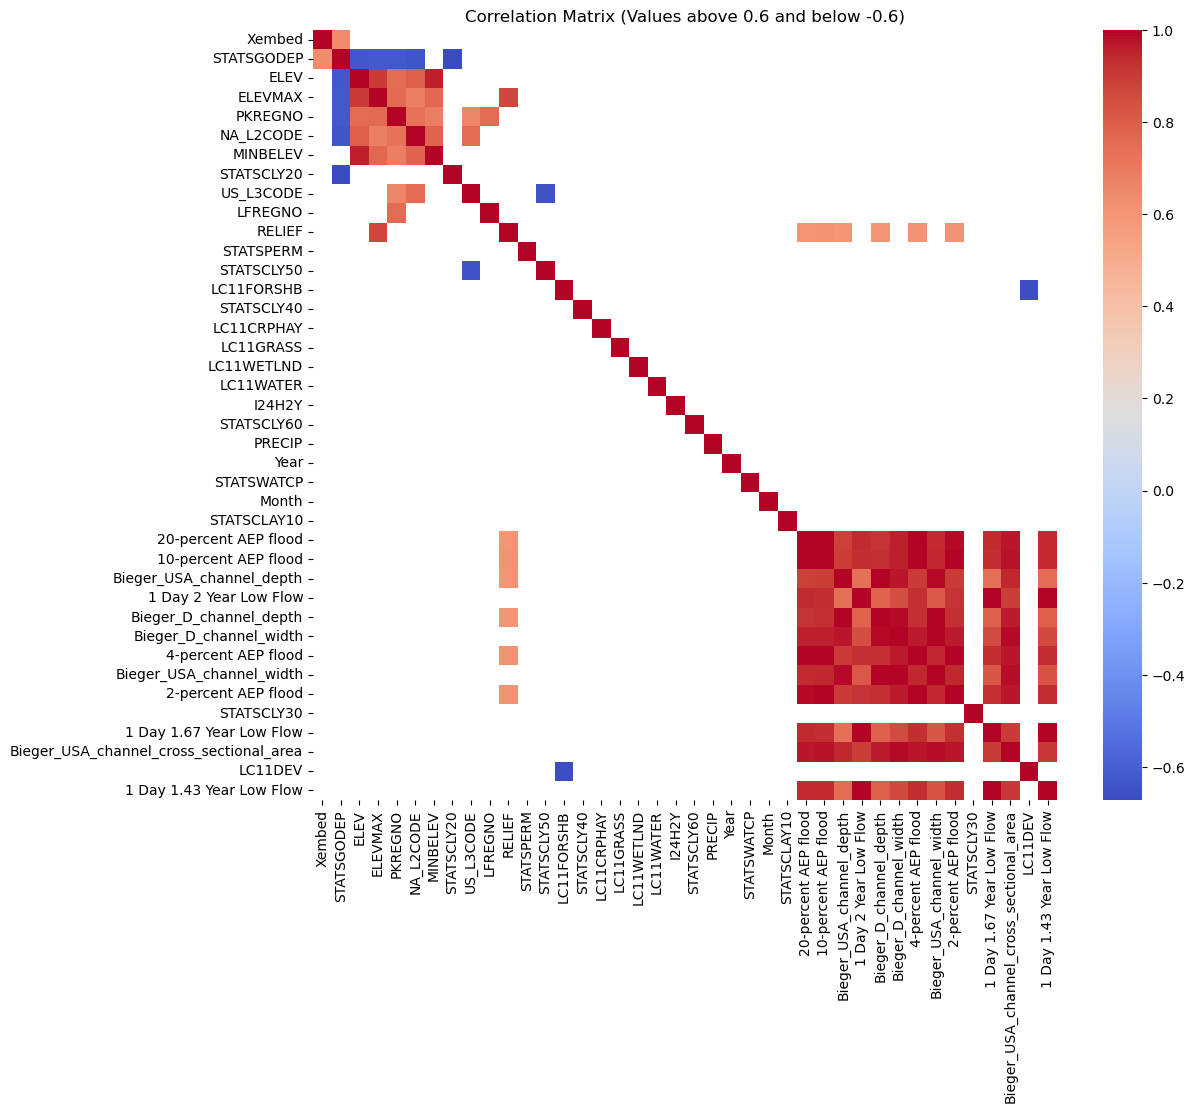

,Xembed,STATSGODEP,ELEV,ELEVMAX,PKREGNO,NA_L2CODE,MINBELEV,STATSCLY20,US_L3CODE,LFREGNO,RELIEF,STATSPERM,STATSCLY50,LC11FORSHB,STATSCLY40,LC11CRPHAY,LC11GRASS,LC11WETLND,LC11WATER,I24H2Y,STATSCLY60,PRECIP,Year,STATSWATCP,Month,STATSCLAY10,20-percent AEP flood,10-percent AEP flood,Bieger_USA_channel_depth,1 Day 2 Year Low Flow,Bieger_D_channel_depth,Bieger_D_channel_width,4-percent AEP flood,Bieger_USA_channel_width,2-percent AEP flood,STATSCLY30,1 Day 1.67 Year Low Flow,Bieger_USA_channel_cross_sectional_area,LC11DEV,1 Day 1.43 Year Low Flow
Xembed,1.000000,0.636138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STATSGODEP,0.636138,1.000000,-0.628954,-0.616593,-0.623579,-0.632707,NaN,-0.671813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ELEV,NaN,-0.628954,1.000000,0.899885,0.754905,0.794707,0.955715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ELEVMAX,NaN,-0.616593,0.899885,1.000000,0.759339,0.684469,0.769526,NaN,NaN,NaN,0.864124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PKREGNO,NaN,-0.623579,0.754905,0.759339,1.000000,0.730805,0.688646,NaN,0.654575,0.756719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STATSCLY30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1 Day 1.67 Year Low Flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.938858,0.934451,0.742189,0.999144,0.785810,0.851850,0.928815,0.821737,0.923388,NaN,1.000000,0.899373,NaN,0.999430
Bieger_USA_channel_cross_sectional_area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.973284,0.974368,0.942833,0.893097,0.966746,0.991389,0.973734,0.982647,0.971607,NaN,0.899373,1.000000,NaN,0.904708
LC11DEV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.661912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [90]:
# Let's make a heatmap of correlation values above/below 0.6 to check for interdependency

# Filter correlation matrix for values above 0.6 and below -0.6
high_corr1 = filtered_corr1[(filtered_corr1 > 0.6) | (filtered_corr1 < -0.6)]

# Create heatmap for filtered matrix
plt.figure(figsize=(12,10))
sns.heatmap(high_corr1,
            cmap = 'coolwarm')
plt.title('Correlation Matrix (Values above 0.6 and below -0.6)')
plt.show()

# Print correlation values
high_corr1

#### Takeaways:
1. Only select ELEV (remove other elevation variables)
6. Pick one flood --> 20-percent AEP flood
7. Pick out one depth --> Bieger_USE_channel_depth
8. Take out low flows

In [96]:
# Remove first few columns and rows of interest
high_corr2 = filtered_corr1.drop(index = ['ELEVMAX',
                                  'MINBELEV',
                                   'NA_L2CODE',
                                   'US_L3CODE',
                                    'LFREGNO',
                                   '10-percent AEP flood',
                                   '1 Day 2 Year Low Flow',
                                    'Bieger_D_channel_depth',
                                   'Bieger_D_channel_width',
                                    '4-percent AEP flood',
                                   '2-percent AEP flood',
                                    '1 Day 1.67 Year Low Flow',
                                    'LC11DEV',
                                    '1 Day 1.43 Year Low Flow'],
                           columns = ['ELEVMAX',
                                  'MINBELEV',
                                   'NA_L2CODE',
                                   'US_L3CODE',
                                    'LFREGNO',
                                   '10-percent AEP flood',
                                   '1 Day 2 Year Low Flow',
                                    'Bieger_D_channel_depth',
                                   'Bieger_D_channel_width',
                                    '4-percent AEP flood',
                                   '2-percent AEP flood',
                                    '1 Day 1.67 Year Low Flow',
                                    'LC11DEV',
                                    '1 Day 1.43 Year Low Flow'])

In [97]:
# Display new correlation matrix, which will be used for final decisions of model features
high_corr2

,Xembed,STATSGODEP,ELEV,PKREGNO,STATSCLY20,RELIEF,STATSPERM,STATSCLY50,LC11FORSHB,STATSCLY40,LC11CRPHAY,LC11GRASS,LC11WETLND,LC11WATER,I24H2Y,STATSCLY60,PRECIP,Year,STATSWATCP,Month,STATSCLAY10,20-percent AEP flood,Bieger_USA_channel_depth,Bieger_USA_channel_width,STATSCLY30,Bieger_USA_channel_cross_sectional_area
Xembed,1.000000,0.636138,-0.576160,-0.544441,-0.476008,-0.451912,-0.407045,0.348277,-0.309803,0.287355,0.279314,0.263214,0.218913,0.183632,0.158209,-0.142969,-0.137294,-0.124494,-0.090145,-0.078641,-0.058421,-0.056502,-0.049775,-0.041145,0.036070,-0.029012
STATSGODEP,0.636138,1.000000,-0.628954,-0.623579,-0.671813,-0.471766,-0.487289,0.559632,-0.439850,0.252449,0.277792,0.221635,0.202001,0.103866,0.321122,-0.087137,-0.047874,-0.059598,-0.110119,-0.103565,0.031364,-0.096713,-0.090803,-0.087110,0.005619,-0.078875
ELEV,-0.576160,-0.628954,1.000000,0.754905,0.519510,0.570156,0.469712,-0.341606,0.421807,-0.344742,-0.193197,-0.176602,-0.325192,-0.239185,-0.256123,0.221557,0.358324,0.034355,0.056414,0.125051,0.093131,0.120745,0.104604,0.099810,-0.099922,0.088950
PKREGNO,-0.544441,-0.623579,0.754905,1.000000,0.437953,0.573950,0.340677,-0.407981,0.249909,-0.364309,-0.052092,-0.220908,-0.382157,-0.177969,-0.447820,0.359799,0.087611,0.030217,0.122297,0.093665,-0.011272,0.175219,0.164684,0.152894,0.011891,0.129646
STATSCLY20,-0.476008,-0.671813,0.519510,0.437953,1.000000,0.363403,0.529440,-0.398117,0.433283,-0.312946,-0.381337,-0.175146,-0.054877,-0.102340,-0.234909,-0.083037,0.179718,0.023229,-0.051566,0.118497,-0.081620,0.011563,0.019375,0.014849,-0.342506,0.008626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20-percent AEP flood,-0.056502,-0.096713,0.120745,0.175219,0.011563,0.607471,0.054187,-0.073150,0.035911,-0.045439,0.074846,-0.088268,-0.078870,0.125512,-0.033287,0.094036,-0.018470,-0.105966,0.356827,-0.001749,-0.007802,1.000000,0.887663,0.939658,0.040497,0.973284
Bieger_USA_channel_depth,-0.049775,-0.090803,0.104604,0.164684,0.019375,0.601874,0.070512,-0.066140,0.002232,-0.049258,0.078391,-0.079355,-0.048282,0.192252,-0.048233,0.125160,-0.042025,-0.061382,0.487970,-0.001134,-0.023003,0.887663,1.000000,0.987833,0.013926,0.942833
Bieger_USA_channel_width,-0.041145,-0.087110,0.099810,0.152894,0.014849,0.598732,0.064123,-0.066014,0.012394,-0.038438,0.075906,-0.077542,-0.045885,0.188402,-0.045820,0.117991,-0.043982,-0.081587,0.452636,0.000078,-0.018296,0.939658,0.987833,1.000000,0.012923,0.982647
STATSCLY30,0.036070,0.005619,-0.099922,0.011891,-0.342506,0.042283,-0.007817,-0.309176,-0.160517,-0.240903,0.107591,-0.152551,0.003126,0.034842,0.130953,-0.212263,-0.015500,0.057913,0.107474,0.069597,-0.059123,0.040497,0.013926,0.012923,1.000000,0.011335


#### Before we move forward, we will look at the features within the Excel sheet and identify variables of interest based on our physical understanding of embeddedness.

#### Identifed features from StreamStats engine:
1. RELIEF
2. I24H2Y
3. DRNAREA
4. ELEV

#### The final features were selected based on correlations and physical understandings of sediment transport

In [112]:
# Select final columns from vdeqstreamstats
vadeq_strmsts = vadeq_strmsts[['StationID',
                                 'Xembed',
                                 'STATSGODEP',
                                 'ELEV',
                                 'STATSCLY20',
                                 'RELIEF',
                                 'STATSPERM',
                                 'STATSCLY50',
                                 'LC11FORSHB',
                                 'LC11CRPHAY',
                                 'I24H2Y', 
                                 'PRECIP',
                                 'Year',
                                 'DRNAREA_SQKM',
                                 'PKREGNO',
                                'Month']]

In [113]:
# Print updated dataframe
vadeq_strmsts

,StationID,Xembed,STATSGODEP,ELEV,STATSCLY20,RELIEF,STATSPERM,STATSCLY50,LC11FORSHB,LC11CRPHAY,I24H2Y,PRECIP,Year,DRNAREA_SQKM,PKREGNO,Month
0,1AACO006.10,62.545455,70.48,148.98,0.00,171.0,2.895,0.00,16.23,0.00,3.140,43.078,2006,0.181817,1551,11
1,1AACO004.84,51.636364,66.65,308.44,51.85,451.0,2.395,0.00,22.49,0.11,3.167,43.888,2008,104.894595,1550,6
2,1AACO006.10,56.818182,70.48,148.98,0.00,171.0,2.895,0.00,16.23,0.00,3.140,43.078,2008,0.181817,1551,6
3,1AACO009.14,63.454545,66.39,324.56,54.64,357.0,2.271,0.00,22.65,0.09,3.169,43.981,2008,94.016637,1551,6
4,1AAUA017.60,65.454545,56.77,317.16,0.30,278.0,1.506,0.00,67.67,7.74,3.055,43.317,2005,76.922703,1551,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,2BXRK001.64,67.090909,68.00,796.84,0.00,575.0,2.000,0.00,95.34,0.00,3.723,49.307,2022,1.968392,1553,10
1113,2-JKS070.06,27.636364,44.64,2821.90,69.18,2550.0,5.089,0.00,77.43,17.98,2.959,43.163,2022,269.358960,1554,9
1114,4ASNA007.82,95.909091,71.04,604.47,0.00,691.0,1.114,90.49,60.89,23.17,3.319,45.609,2022,206.940201,1551,9
1115,8-MIC001.47,89.090909,72.00,298.12,0.00,197.0,1.000,100.00,41.15,49.07,3.290,43.671,2022,14.633444,1551,10


Since the PKREGNO is a categorical descriptor, we will one-hot encode the feature for the model.

### 2c. Create scatterplots against target

Let's plot each feature set against the target to look for obvious red flags.

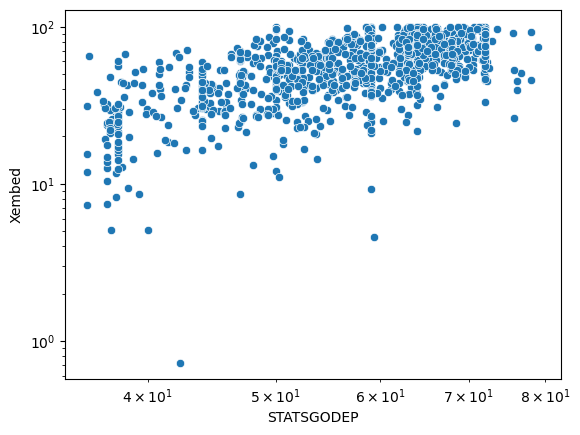

In [98]:
# Plot embeddedness against top correlation STATSGODEP
sns.scatterplot(data = vadeq_strmsts,
               x = "STATSGODEP",
               y = "Xembed")
plt.xscale('log')
plt.yscale('log')

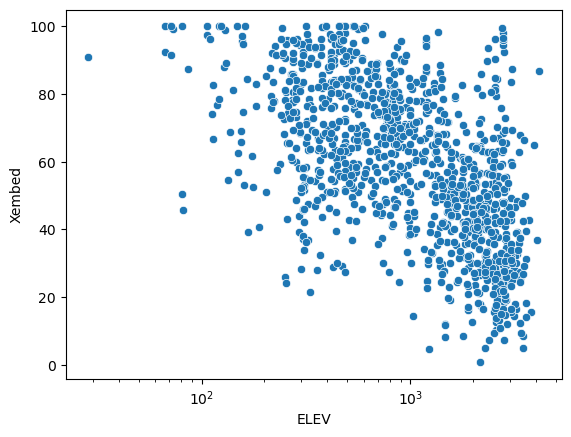

In [99]:
#Plot embeddedness against second correlation
sns.scatterplot(data = vadeq_strmsts,
               x = "ELEV",
               y = "Xembed")
plt.xscale('log')

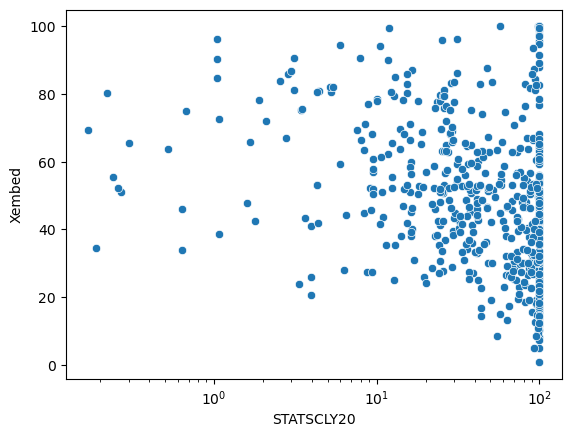

In [110]:
#Plot embeddedness against third correlation
sns.scatterplot(data = vadeq_strmsts,
               x = "STATSCLY20",
               y = "Xembed")
plt.xscale('log')

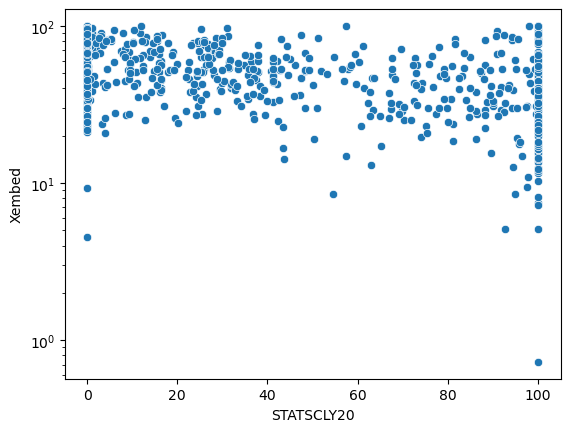

In [101]:
# Plot embeddedness against fourth correlation
sns.scatterplot(data = vadeq_strmsts,
               x = "RELIEF",
               y = "Xembed")
plt.yscale('log')

<Axes: xlabel='STATSPERM', ylabel='Xembed'>

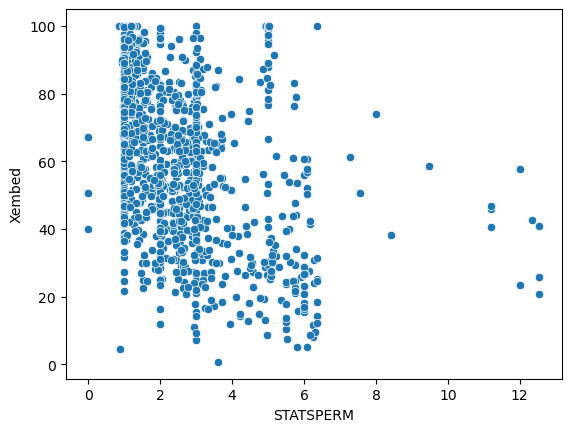

In [104]:
# Plot embeddedness against feature
sns.scatterplot(data = vadeq_strmsts,
               x = "STATSPERM",
               y = "Xembed")

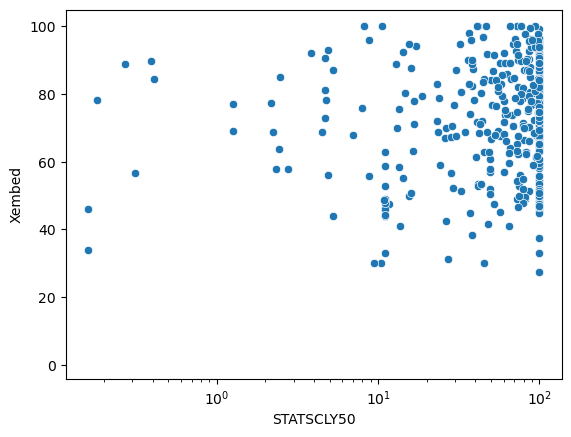

In [111]:
# Plot embeddedness against feature
sns.scatterplot(data = vadeq_strmsts,
               x = "STATSCLY50",
               y = "Xembed")
plt.xscale('log')

<Axes: xlabel='LC11FORSHB', ylabel='Xembed'>

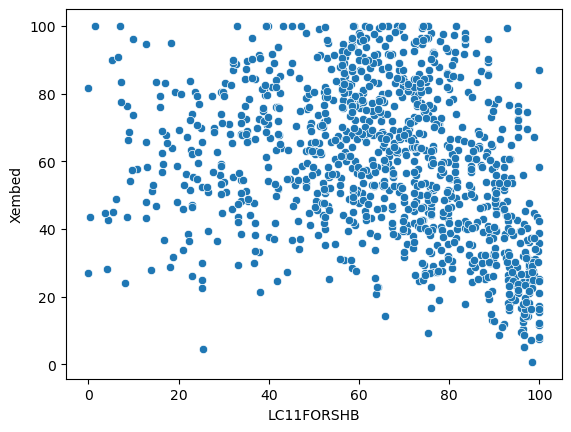

In [106]:
# Plot embeddedness against feature
sns.scatterplot(data = vadeq_strmsts,
               x = "LC11FORSHB",
               y = "Xembed")

<Axes: xlabel='I24H2Y', ylabel='Xembed'>

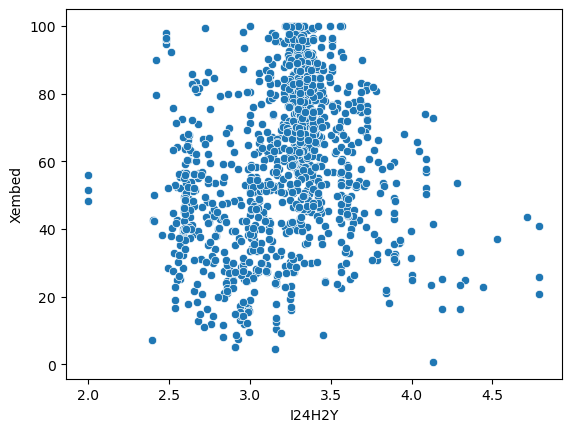

In [107]:
# Plot embeddedness against feature
sns.scatterplot(data = vadeq_strmsts,
               x = "I24H2Y",
               y = "Xembed")

<Axes: xlabel='PRECIP', ylabel='Xembed'>

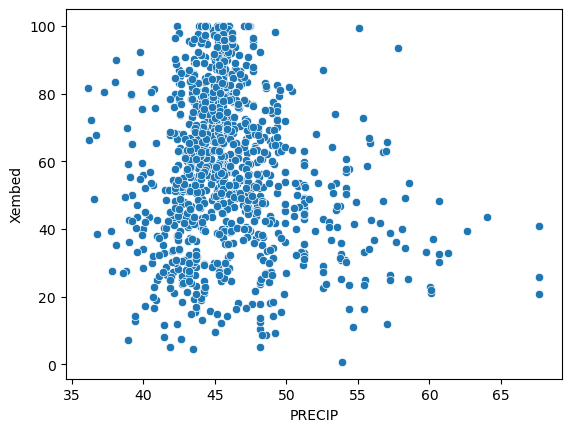

In [108]:
# Plot embeddedness against feature
sns.scatterplot(data = vadeq_strmsts,
               x = "PRECIP",
               y = "Xembed")

<Axes: xlabel='DRNAREA_SQKM', ylabel='Xembed'>

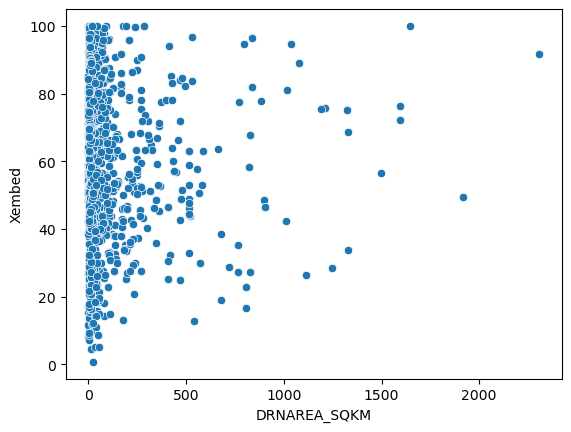

In [116]:
# Plot embeddedness against feature
sns.scatterplot(data = vadeq_strmsts,
               x = "DRNAREA_SQKM",
               y = "Xembed")

### 2d. Histograms

We will quickly check that the density of certain columns are valid.

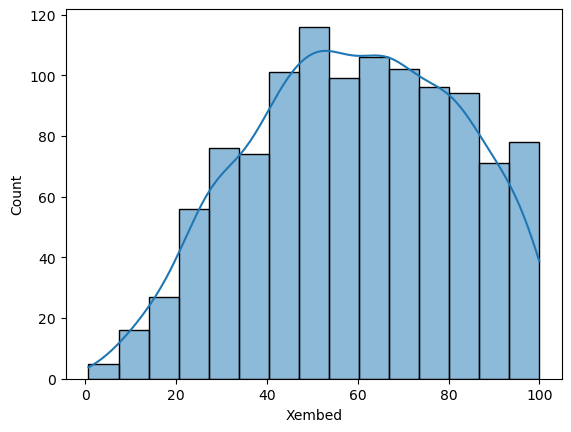

In [77]:
# Plot histogram of target variable
sns.histplot(vadeq_strmsts['Xembed'], 
             kde = True)
plt.show()

This is good! We don't see much visual bias in our target. It looks relatively normally distributed, if not a little left-skewed.

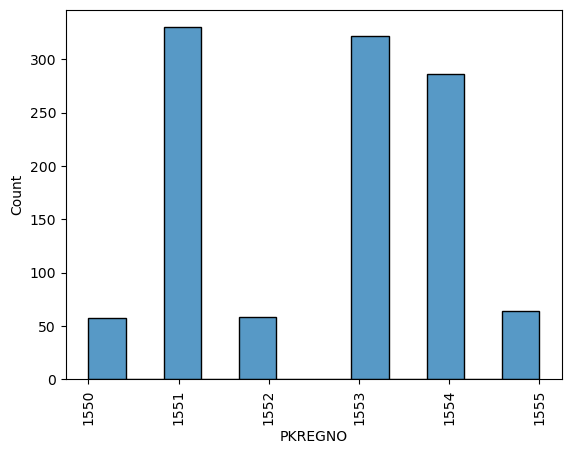

PKREGNO
1551    330
1553    322
1554    286
1555     64
1552     58
1550     57
Name: count, dtype: int64

In [117]:
# Plot histogram of Peak Flow Regional Number
sns.histplot(vadeq_strmsts['PKREGNO'])
plt.xticks(rotation=90)
plt.show()

# Display counts for each peak flow region number
vadeq_strmsts['PKREGNO'].value_counts()

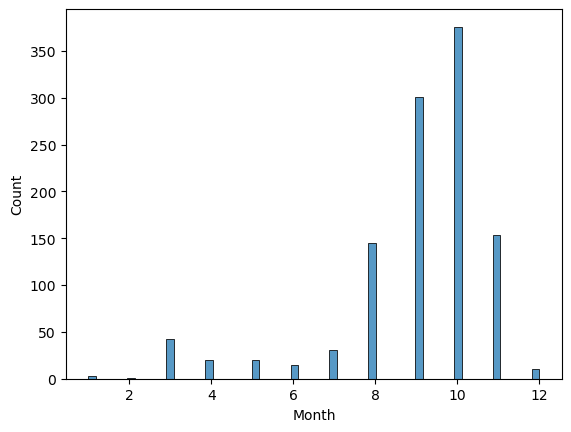

Month
10    376
9     301
11    153
8     145
3      42
7      31
5      20
4      20
6      15
12     10
1       3
2       1
Name: count, dtype: int64

In [79]:
# Plot histogram of Month
sns.histplot(vadeq_strmsts['Month'])
plt.show()

# Display number of measurements for each month
vadeq_strmsts['Month'].value_counts()

**From the histogram of month information above, we can see that stations are monitored almost exclusively during the fall. This is expected given the difficulty of monitoring during the colder months. Given this information, we're going to remove month from the model dataset.**

In [119]:
# Drop month from dataframe
vadeq_strmsts_trim1 = vadeq_strmsts.drop(columns = ['Month'])

In [120]:
# One hot encode PKREGNO using pandas
vadeq_strmsts_mdl = pd.get_dummies(vadeq_strmsts_trim1,
                                   columns = ['PKREGNO'])

# Print dataset
vadeq_strmsts_mdl

,StationID,Xembed,STATSGODEP,ELEV,STATSCLY20,RELIEF,STATSPERM,STATSCLY50,LC11FORSHB,LC11CRPHAY,I24H2Y,PRECIP,Year,DRNAREA_SQKM,PKREGNO_1550,PKREGNO_1551,PKREGNO_1552,PKREGNO_1553,PKREGNO_1554,PKREGNO_1555
0,1AACO006.10,62.545455,70.48,148.98,0.00,171.0,2.895,0.00,16.23,0.00,3.140,43.078,2006,0.181817,False,True,False,False,False,False
1,1AACO004.84,51.636364,66.65,308.44,51.85,451.0,2.395,0.00,22.49,0.11,3.167,43.888,2008,104.894595,True,False,False,False,False,False
2,1AACO006.10,56.818182,70.48,148.98,0.00,171.0,2.895,0.00,16.23,0.00,3.140,43.078,2008,0.181817,False,True,False,False,False,False
3,1AACO009.14,63.454545,66.39,324.56,54.64,357.0,2.271,0.00,22.65,0.09,3.169,43.981,2008,94.016637,False,True,False,False,False,False
4,1AAUA017.60,65.454545,56.77,317.16,0.30,278.0,1.506,0.00,67.67,7.74,3.055,43.317,2005,76.922703,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,2BXRK001.64,67.090909,68.00,796.84,0.00,575.0,2.000,0.00,95.34,0.00,3.723,49.307,2022,1.968392,False,False,False,True,False,False
1113,2-JKS070.06,27.636364,44.64,2821.90,69.18,2550.0,5.089,0.00,77.43,17.98,2.959,43.163,2022,269.358960,False,False,False,False,True,False
1114,4ASNA007.82,95.909091,71.04,604.47,0.00,691.0,1.114,90.49,60.89,23.17,3.319,45.609,2022,206.940201,False,True,False,False,False,False
1115,8-MIC001.47,89.090909,72.00,298.12,0.00,197.0,1.000,100.00,41.15,49.07,3.290,43.671,2022,14.633444,False,True,False,False,False,False


## Step 4. Export dataset

In [121]:
# Push to excel
vadeq_mdl_path = os.path.join(BASE_DIR, "data", "processed", "virginia", "vadeq_strmsts_after_eda.xlsx")
vadeq_strmsts_mdl.to_excel(vadeq_mdl_path)

## Next Steps
Now we will move forward to model selection, evaluation, and deployment!